<a href="https://colab.research.google.com/github/henryspg/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_DS16_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [79]:
# cell_phones.head()

cell_phones.dtypes

geo                   object
time                   int64
cell_phones_total    float64
dtype: object

Check for missing/null values in the three dataframes

In [0]:
# Your Work Here

In [81]:
#cell_phones

print (cell_phones.dtypes)
print("")
print(cell_phones.shape)
print("")
cell_phones.isnull().sum().sum()

geo                   object
time                   int64
cell_phones_total    float64
dtype: object

(9427, 3)



0

In [82]:
#population:

print (population.dtypes)
print("")
print(population.shape)
print("")
population.isnull().sum()


geo                 object
time                 int64
population_total     int64
dtype: object

(59297, 3)



geo                 0
time                0
population_total    0
dtype: int64

In [83]:
# geocountry

print (geo_country_codes.dtypes)
print("")
print(geo_country_codes.shape)
print("")
geo_country_codes.isnull().sum().sum()


geo        object
country    object
dtype: object

(273, 2)



0

There is no Missing value in those 3 DF.  I expanded checking shape & dtypes

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

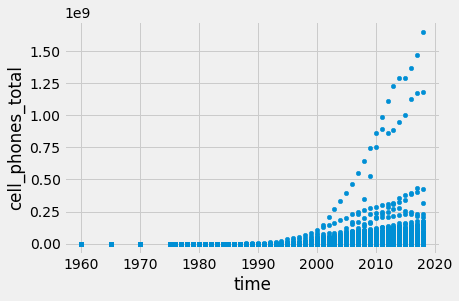

In [84]:
# Your Work Here

cell_phones.plot.scatter('time', 'cell_phones_total');

From the above figure, # cell_phones density in certain countries jump high from 1990's.  Probably Europe & US & Japan.

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [85]:
# Your Work Here

# phone_population = population.merge(cell_phones, on=['geo', 'time'], how='inner')  ## just try another way

phone_population = pd.merge(population, cell_phones, on=['geo', 'time'], how='inner')

print(phone_population.shape)
phone_population.tail()

## looks like discrepancy with (8590, 4)

(8786, 4)


,geo,time,population_total,cell_phones_total
8781,zwe,2014,13586710,11798652.0
8782,zwe,2015,13814642,12757410.0
8783,zwe,2016,14030338,12878926.0
8784,zwe,2017,14236599,14092104.0
8785,zwe,2018,14438812,12908992.0


In [0]:
# print(phone_population.iloc[101:200].head(50))

# phone_population['cell_phones_total'] = phone_population['cell_phones_total'].astype(int)
# phone_population['cell_phones_total'].str.strip()


In [0]:
# phone_population['cell_phones_total]

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [88]:
# Your Work Here

country_population_phone = geo_country_codes.merge(phone_population, how='inner')

print(country_population_phone.shape)
print("")
country_population_phone.head()

(8786, 5)



,geo,country,time,population_total,cell_phones_total
0,afg,Afghanistan,1960,8996967,0.0
1,afg,Afghanistan,1965,9956318,0.0
2,afg,Afghanistan,1970,11173654,0.0
3,afg,Afghanistan,1975,12689164,0.0
4,afg,Afghanistan,1976,12943093,0.0


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [196]:
# Your Work Here 

dx = country_population_phone[['geo', 'country', 'time', 'population_total',  'cell_phones_total']]
dx.head()


,geo,country,time,population_total,cell_phones_total
0,afg,Afghanistan,1960,8996967,0.0
1,afg,Afghanistan,1965,9956318,0.0
2,afg,Afghanistan,1970,11173654,0.0
3,afg,Afghanistan,1975,12689164,0.0
4,afg,Afghanistan,1976,12943093,0.0


In [197]:
dx['celperperson'] = (dx['cell_phones_total'] / dx['population_total'])

print(dx.shape)
dx.tail()

(8786, 6)


,geo,country,time,population_total,cell_phones_total,celperperson
8781,zwe,Zimbabwe,2014,13586710,11798652.0,0.868397
8782,zwe,Zimbabwe,2015,13814642,12757410.0,0.923470
8783,zwe,Zimbabwe,2016,14030338,12878926.0,0.917934
8784,zwe,Zimbabwe,2017,14236599,14092104.0,0.989850
8785,zwe,Zimbabwe,2018,14438812,12908992.0,0.894048


In [198]:
# Checking:  USA in 2017

dx[(dx['time']==2017)  & (dx['geo']=='usa')]


# not the same as  1.220  

,geo,country,time,population_total,cell_phones_total,celperperson
8319,usa,United States,2017,325084758,400000000.0,1.230448


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [199]:
# Your Work Here

# print(df.dtypes)
# # print()
dx.describe(include='all')


,geo,country,time,population_total,cell_phones_total,celperperson
count,8786,8786,8786.000000,8.786000e+03,8.786000e+03,8786.000000
unique,195,195,NaN,NaN,NaN,NaN
top,phl,Azerbaijan,NaN,NaN,NaN,NaN
freq,47,47,NaN,NaN,NaN,NaN
mean,NaN,NaN,1994.721603,3.002185e+07,9.701331e+06,0.298025
std,NaN,NaN,14.525220,1.172833e+08,5.968296e+07,0.468332
min,NaN,NaN,1960.000000,4.377000e+03,0.000000e+00,0.000000
25%,NaN,NaN,1983.000000,1.474928e+06,0.000000e+00,0.000000
50%,NaN,NaN,1995.000000,5.816554e+06,8.500000e+03,0.002346
75%,NaN,NaN,2007.000000,1.823047e+07,2.028511e+06,0.532728


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [0]:
# Change cellphone total from float to integer:

# df['cell_phones_total'].astype('int64')

In [200]:
# Your Work Here

# df.dtypes

dx[dx['time']==2017].sort_values(by='cell_phones_total', ascending=False).head()

,geo,country,time,population_total,cell_phones_total,celperperson
1530,chn,China,2017,1421021794,1.469882e+09,1.034384
3674,ind,India,2017,1338676779,1.168902e+09,0.873177
3627,idn,Indonesia,2017,264650969,4.351936e+08,1.644406
8319,usa,United States,2017,325084758,4.000000e+08,1.230448
6783,rus,Russia,2017,145530091,2.272997e+08,1.561874


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


### Part 1 — Recreate this explanatory visualization:



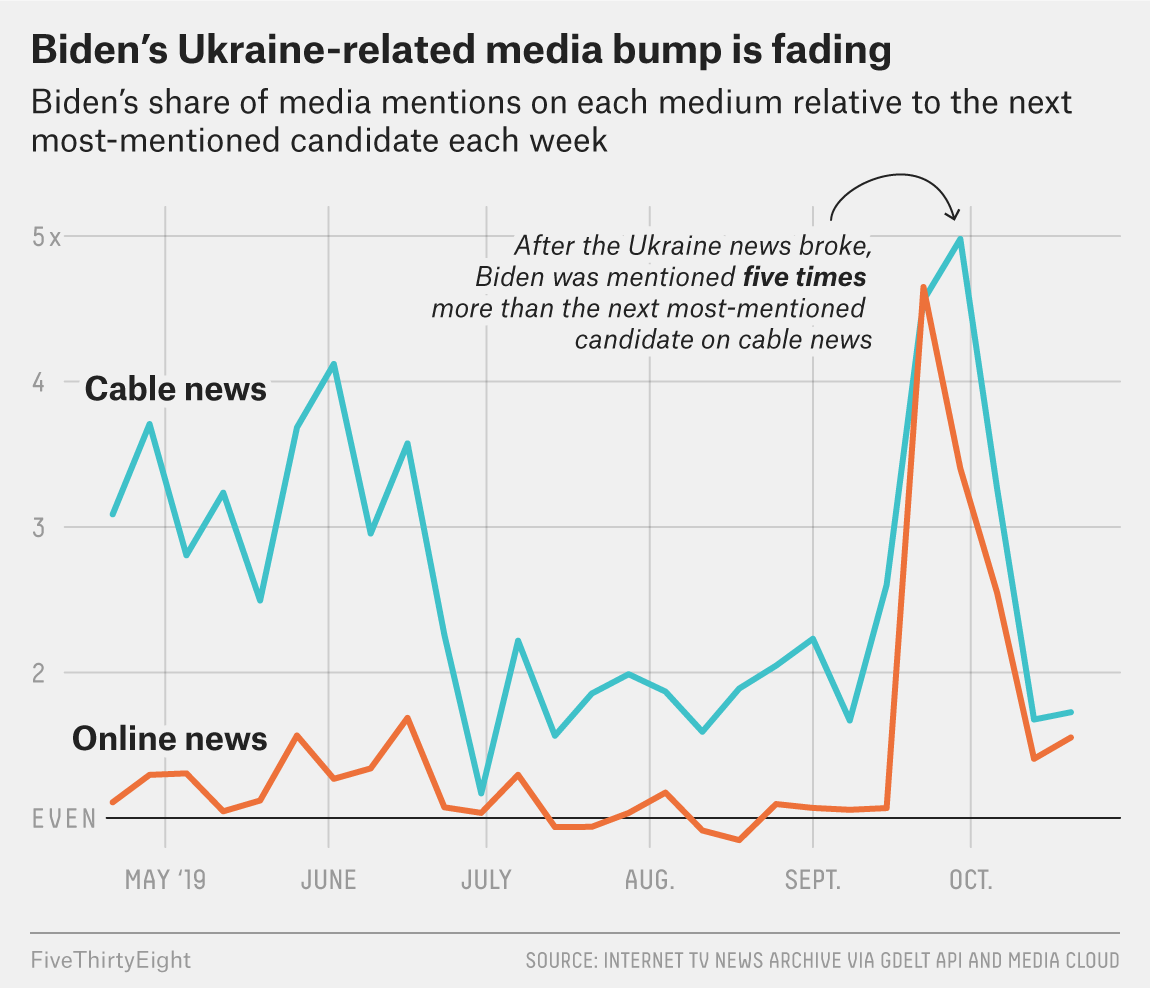

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 2 lines visualizing the Cable news vs Online news lines The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Biden's Ukraine-related media bump is fading"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week"_

In [170]:
# Your Work Here


# data_for_graph.reset_index(level='date')

print(data_for_graph.dtypes)
data_for_graph.tail()

biden_cable_multiple     float64
biden_online_multiple    float64
dtype: object


,biden_cable_multiple,biden_online_multiple
date,,
2019-09-22,4.558233,4.649776
2019-09-29,4.980180,3.402359
2019-10-06,3.260229,2.545723
2019-10-13,1.676190,1.406303
2019-10-20,1.726508,1.552770


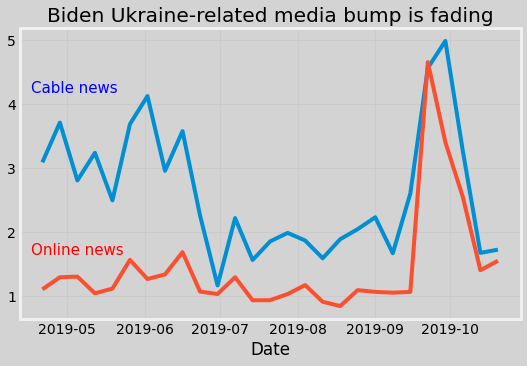

In [171]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 5))


# ax.plot(data_for_graph['date'], data_for_graph['biden_cable_multiple'])   ## correct
ax.plot(data_for_graph.index.values , data_for_graph['biden_cable_multiple'])   ## correct
ax.plot(data_for_graph.index.values , data_for_graph['biden_online_multiple'])   ## correct
ax.set_title('Biden Ukraine-related media bump is fading')
ax.set_xlabel('Date')
ax.set_facecolor('lightgray')
fig.patch.set_facecolor('lightgray')
fig.text(0.1, 0.25, 'Online news', color = 'red', fontsize=15)
fig.text(0.1, 0.7, 'Cable news', color = 'blue', fontsize=15)
# ax.annotate('local max', xy=(2019-10, 4), xytext=(0.6, 0.6), arrowprops=dict(facecolor='black', shrink=0.05))  ## failed to get annotation  !!!

plt.show()

In [0]:
# dd = data_for_graph

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 
~~ answr below

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 
>>>> We want only the data of the country & time listed only.
### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc. 

If you have already completed everything else, take this as far as you can within the time limit.


In [192]:
# Data Wrangling Section 1
# Filter the cell_phones dataframe to only include information about the USA and China and then remake the scatterplot.

# print (cell_phones.dtypes)
# print("")
# print(cell_phones.shape)


chn_usa= cell_phones[(cell_phones['geo']=='chn') & (cell_phones['geo']=='chn')] 

chn_usa.head()



,geo,time,cell_phones_total
1599,chn,1960,0.0
1600,chn,1965,0.0
1601,chn,1970,0.0
1602,chn,1975,0.0
1603,chn,1976,0.0


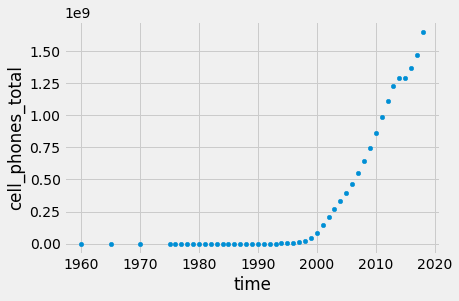

In [193]:
chn_usa.plot.scatter('time', 'cell_phones_total');

In [194]:
# Data Wrangling Section 3
# Modify the geo column to make the geo codes uppercase instead of lowercase.

chn_usa.rename(columns={'geo': 'GEO'}, inplace=True) 
chn_usa.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,GEO,time,cell_phones_total
1599,chn,1960,0.0
1600,chn,1965,0.0
1601,chn,1970,0.0
1602,chn,1975,0.0
1603,chn,1976,0.0


In [202]:
# Data Wrangling Section 4
# 2017 was the first year that China had more cell phones than people.
# What was the first year that the USA had more cell phones than people?

dx.rename(columns={'geo': 'GEO'}, inplace=True) 
dx.head()


,GEO,country,time,population_total,cell_phones_total,celperperson
0,afg,Afghanistan,1960,8996967,0.0,0.0
1,afg,Afghanistan,1965,9956318,0.0,0.0
2,afg,Afghanistan,1970,11173654,0.0,0.0
3,afg,Afghanistan,1975,12689164,0.0,0.0
4,afg,Afghanistan,1976,12943093,0.0,0.0


In [204]:
#Dataframe for USA

dx_usa = dx[dx['GEO']=='usa']
dx_usa.head()



,GEO,country,time,population_total,cell_phones_total,celperperson
8277,usa,United States,1960,186720570,0.0,0.0
8278,usa,United States,1965,199733679,0.0,0.0
8279,usa,United States,1970,209513340,0.0,0.0
8280,usa,United States,1975,219081250,0.0,0.0
8281,usa,United States,1976,221086427,0.0,0.0


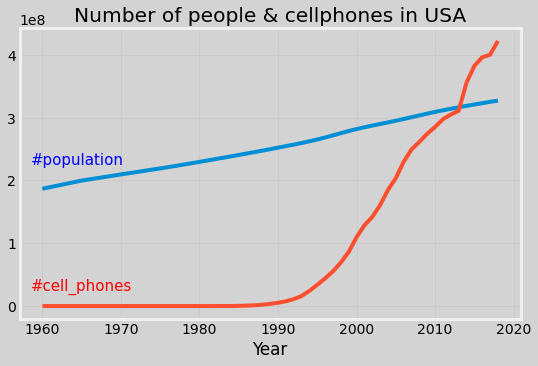

In [216]:
#Show the intersection: #population & #phones

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 5))


ax.plot(dx_usa['time'], dx_usa['population_total'])   ## correct
ax.plot(dx_usa['time'], dx_usa['cell_phones_total'])   ## correct

ax.set_title('Number of people & cellphones in USA')
ax.set_xlabel('Year')
ax.set_facecolor('lightgray')
fig.patch.set_facecolor('lightgray')
fig.text(0.1, 0.15, '#cell_phones', color = 'red', fontsize=15)
fig.text(0.1, 0.5, '#population', color = 'blue', fontsize=15)
# ax.annotate('local max', xy=(2013, 3.5), xytext=(0.6, 0.6), arrowprops=dict(facecolor='black', shrink=0.5))  ## failed to get annotation  !!!

plt.show()

In [217]:
#  #Cell phones exceeded #populations in 2014.  BElow is the proof

dx_usa[dx_usa['time']>2010]

,GEO,country,time,population_total,cell_phones_total,celperperson
8313,usa,United States,2011,311584051,297404000.0,0.954490
8314,usa,United States,2012,314043885,304838000.0,0.970686
8315,usa,United States,2013,316400539,310698000.0,0.981977
8316,usa,United States,2014,318673422,355500000.0,1.115562
8317,usa,United States,2015,320878312,382307000.0,1.191439
8318,usa,United States,2016,323015992,396000000.0,1.225945
8319,usa,United States,2017,325084758,400000000.0,1.230448
8320,usa,United States,2018,327096263,422000000.0,1.290140
